In [11]:
import csv, datetime, pandas as pd

# Read data for January 2

In [12]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-02-mhn.csv'

parse_dates = ['timestamp']
data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
pd.to_datetime(data['timestamp'])
print(data.shape)

(4797, 12)


Finding out unique sources

In [4]:
unique_src = data.src.unique()
print(len(unique_src))

970


Unique ip sources frequency table

In [5]:
df = data.groupby('src').size().reset_index(name='Count').rename(columns={'src':'Unique src'}).sort_values('Count', ascending = False)
print(df.head())

          Unique src  Count
954     94.100.30.46    816
436    185.107.94.10    518
444  185.186.245.108    490
950     93.115.26.45    449
632   212.129.39.185    429


In [6]:
df = data.groupby('app').size().reset_index(name='Count').rename(columns={'app':'Unique app'}).sort_values('Count', ascending = False)
print(df)

  Unique app  Count
1    dionaea   4452
0       amun    345


Grouping by timestamp

In [7]:
df = data.groupby('timestamp').size().reset_index(name='Count')
print(df.head())

            timestamp  Count
0 2018-01-01 06:51:44      2
1 2018-01-01 06:52:04      1
2 2018-01-01 06:52:14      1
3 2018-01-01 06:53:04      2
4 2018-01-01 06:53:34      2


In [8]:
time_series = data.groupby(df.timestamp.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp':'Hour'})
print(time_series)

    Hour  Count
0    0.0     92
1    1.0     81
2    2.0     73
3    3.0     76
4    4.0     80
5    5.0     76
6    6.0     65
7    7.0     77
8    8.0     73
9    9.0     82
10  10.0    102
11  11.0     85
12  12.0    104
13  13.0     60
14  14.0     61
15  15.0    115
16  16.0     82
17  17.0    143
18  18.0    252
19  19.0    113
20  20.0    110
21  21.0     94
22  22.0     93
23  23.0    105


Bar chart of time stamp count

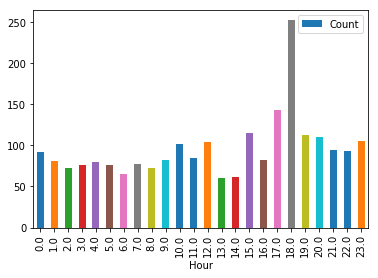

In [10]:
time_series.plot(kind='bar', x = 'Hour', y = 'Count')